
## Part A: PEAS for the Vacuum Cleaner Agent

1. **Performance Measures

   - Complete Cleaning: The agent must clean all dirt in the environment.
   - Minimized Actions: The agent should use the least number of moves and actions.
   - Energy Optimization: The agent starts with 100 energy points and must manage consumption efficiently.
   - Bag Management: The dust bag has a maximum capacity of 10 dirt units and must be emptied before reaching this limit.
   - Return to Base: After cleaning, the agent must return to the starting position A 0r (0,0) to complete its task.

2. **Environment:**
   - Grid Layout: The environment is a 4x4 grid, where each location is represented using (row, column) format (e.g., A = (0,0), P = (3,3)).
   - Dirt Distribution: Some cells contain dirt while others are clean.
   - Agent Start Position: The vacuum begins at location A or (0,0) – top-left corner.
   - Movement Restrictions: The agent can only move North, South, East, or West (no diagonal movement).
   - Action Cost: Each movement or dirt collection reduces energy by 1 point.
   - Bag Capacity: The vacuum can hold up to 10 dirt units before needing to empty at A or (0,0).

3. **Actuators:**
   - Move: The agent moves in one of the four directions (North, South, East, West).
   - Suck: The agent removes dirt from the current location.
   - Empty: The agent empties its dust bag when at home (Location A).

4. **Sensors:**
   - Dirt Sensor: Detects whether the current location is dirty or clean.
   - Location Sensor: Identifies the vacuum's (agent’s) current location.
   - Bag Capacity Sensor: Determines if the bag is full (10 units max).
   - Energy Sensor: Monitors the remaining energy level to ensure efficiency.


## Part B: Pseudo-Code Implementation with Visualization


**Python Code:**

🔄 Moved South → New position: [1, 0], Energy left: 99
🔄 Moved South → New position: [2, 0], Energy left: 98
✅ Sucked dirt at [2, 0], Bag: 1/10, Energy left: 97
🔄 Moved South → New position: [3, 0], Energy left: 96
✅ Sucked dirt at [3, 0], Bag: 2/10, Energy left: 95
🔄 Moved East → New position: [3, 1], Energy left: 94
🔄 Moved East → New position: [3, 2], Energy left: 93
✅ Sucked dirt at [3, 2], Bag: 3/10, Energy left: 92
🔄 Moved North → New position: [2, 2], Energy left: 91
✅ Sucked dirt at [2, 2], Bag: 4/10, Energy left: 90
🔄 Moved North → New position: [1, 2], Energy left: 89
🔄 Moved North → New position: [0, 2], Energy left: 88
✅ Sucked dirt at [0, 2], Bag: 5/10, Energy left: 87
🔄 Moved South → New position: [1, 2], Energy left: 86
🔄 Moved West → New position: [1, 1], Energy left: 85
✅ Sucked dirt at [1, 1], Bag: 6/10, Energy left: 84
🔄 Moved East → New position: [1, 2], Energy left: 83
🔄 Moved East → New position: [1, 3], Energy left: 82
✅ Sucked dirt at [1, 3], Bag: 7/10, Energy le

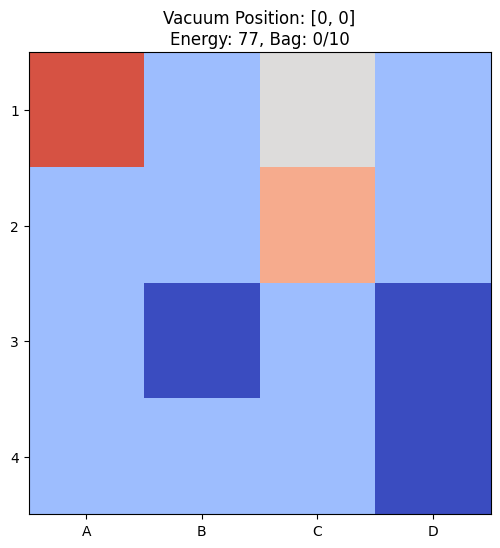

In [9]:
import numpy as np  # Import NumPy for numerical operations
import matplotlib.pyplot as plt  # Import Matplotlib for visualization
import matplotlib.animation as animation  # Import animation module for visualizing movement
from collections import deque  # Import deque for efficient queue operations in BFS

# Define grid size (4x4 grid)
GRID_SIZE = 4

# Define initial dirt locations using (row, column) format
dirt_locations = {(0, 2), (1, 1), (1, 3), (2, 0), (2, 2), (3, 0), (3, 2)}

# Initialize a 4x4 grid where 1 represents dirt and 0 represents a clean cell
grid = np.zeros((GRID_SIZE, GRID_SIZE))  # Start with all clean cells
for loc in dirt_locations:
    grid[loc] = 1  # Mark dirty spots in the grid

# Define the initial state of the vacuum
position = [0, 0]  # Vacuum starts at the top-left corner (0,0)
energy = 100  # The vacuum starts with 100 energy points
bag_capacity = 0  # Amount of dirt collected
bag_limit = 10  # Maximum dirt the vacuum can hold before needing to empty
path = []  # List to track vacuum movement
visit_count = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)  # Track the number of visits to each cell

# Define possible movement directions
directions = {
    "North": (-1, 0),  # Move up
    "South": (1, 0),  # Move down
    "West": (0, -1),  # Move left
    "East": (0, 1)  # Move right
}

# Dictionary to store precomputed BFS shortest paths
path_cache = {}

def bfs(start, target):
    """Find the shortest path from start to target using BFS and cache the result."""
    if (start, target) in path_cache:  # If path is already computed, return it
        return path_cache[(start, target)]
    
    queue = deque([(start, [])])  # Queue stores (current_position, path_taken)
    visited = set()  # Track visited positions to avoid loops

    while queue:
        (current, path) = queue.popleft()  # Get current position and path
        if current == target:  # If we reached the target, return path
            path_cache[(start, target)] = path  # Store in cache
            return path
        
        if current in visited:  # Skip if already visited
            continue
        visited.add(current)

        for direction, (dr, dc) in directions.items():  # Explore all directions
            new_pos = (current[0] + dr, current[1] + dc)  # Compute new position
            if 0 <= new_pos[0] < GRID_SIZE and 0 <= new_pos[1] < GRID_SIZE:  # Ensure within bounds
                queue.append((new_pos, path + [direction]))  # Add to queue with updated path
    
    return []  # Return empty list if no path is found

def move_to_target(target):
    """Move the vacuum cleaner towards the target position."""
    global position, energy
    path_to_target = bfs(tuple(position), target)  # Get shortest path
    
    for step in path_to_target:
        if energy <= 0:  # Stop if out of energy
            print("❌ Out of energy! Stopping movement.")
            return
        move(step)  # Move in the given direction

def move(direction):
    """Move the vacuum cleaner in the specified direction."""
    global position, energy
    if energy <= 0:  # Stop if no energy left
        return
    
    new_row = position[0] + directions[direction][0]
    new_col = position[1] + directions[direction][1]
    
    if 0 <= new_row < GRID_SIZE and 0 <= new_col < GRID_SIZE:  # Ensure the move is valid
        position[0], position[1] = new_row, new_col  # Update vacuum position
        energy -= 1  # Deduct energy per move
        path.append(tuple(position))  # Store movement history
        visit_count[new_row, new_col] += 1  # Track visit frequency
        print(f"🔄 Moved {direction} → New position: {position}, Energy left: {energy}")

def suck():
    """Suck up dirt at the current position."""
    global grid, bag_capacity, energy, dirt_locations
    pos_tuple = tuple(position)
    
    if pos_tuple in dirt_locations:  # If there is dirt at the position
        grid[pos_tuple] = 0  # Mark as clean
        dirt_locations.remove(pos_tuple)  # Remove from dirt list
        bag_capacity += 1  # Increase collected dirt count
        energy -= 1  # Deduct energy
        print(f"✅ Sucked dirt at {position}, Bag: {bag_capacity}/{bag_limit}, Energy left: {energy}")

def navigate_home():
    """Move vacuum back to (0,0) to empty the dirt bag."""
    move_to_target((0, 0))
    empty_bag()

def empty_bag():
    """Empty the vacuum bag when at home position (0,0)."""
    global bag_capacity
    if tuple(position) == (0, 0):  # Ensure vacuum is at home
        print("🗑️ Emptied bag at home!")
        bag_capacity = 0  # Reset bag capacity

def find_nearest_dirt():
    """Find the nearest dirt spot using BFS."""
    queue = deque([tuple(position)])
    visited = set()

    while queue:
        current = queue.popleft()
        if current in dirt_locations:  # Stop when nearest dirt is found
            return current
        
        if current in visited:
            continue
        visited.add(current)

        for dr, dc in directions.values():
            new_pos = (current[0] + dr, current[1] + dc)
            if 0 <= new_pos[0] < GRID_SIZE and 0 <= new_pos[1] < GRID_SIZE:
                queue.append(new_pos)
    
    return None  # No dirt found

def clean_environment():
    """Automate vacuum movement to clean all dirt."""
    global bag_capacity
    
    while energy > 0 and dirt_locations:
        target = find_nearest_dirt()
        if target:
            path_to_target = bfs(tuple(position), target)
            
            # Ensure enough energy to return
            if energy < len(path_to_target) + 2 and bag_capacity > 0:
                navigate_home()
            
            move_to_target(target)
            suck()
        
        # Return home when bag is full or low energy
        if bag_capacity >= bag_limit or (energy < 5 and bag_capacity > 0):
            navigate_home()
    
    print("🎉 Cleaning Complete!")
    navigate_home()

# Start cleaning process
clean_environment()

# Visualization setup
fig, ax = plt.subplots(figsize=(6, 6))

def update(frame):
    """Update grid visualization for animation."""
    ax.clear()
    display_grid = np.copy(grid)  # Copy grid to modify for visualization
    
    for i in range(min(frame + 1, len(path))):
        r, c = path[i]
        display_grid[r, c] = 0.3 + (0.2 * (visit_count[r, c] - 1)) if visit_count[r, c] > 1 else 0.3
    
    for r, c in dirt_locations:
        display_grid[r, c] = 1  # Highlight dirt spots
    
    display_grid[position[0], position[1]] = 0.9 if tuple(position) == (0, 0) else 0.75  # Highlight vacuum position
    ax.imshow(display_grid, cmap="coolwarm", vmin=0, vmax=1)
    ax.set_xticks(range(GRID_SIZE))
    ax.set_yticks(range(GRID_SIZE))
    ax.set_xticklabels(['A', 'B', 'C', 'D'])
    ax.set_yticklabels(['1', '2', '3', '4'])
    ax.set_title(f'Vacuum Position: {position}\nEnergy: {energy}, Bag: {bag_capacity}/{bag_limit}', fontsize=12)

# Animate movement
anim = animation.FuncAnimation(fig, update, frames=len(path), repeat=False, interval=500)
# Save animation as a gif file before displaying
anim.save("vacuum_simulation.gif", writer="pillow")
# Show animation
plt.show()


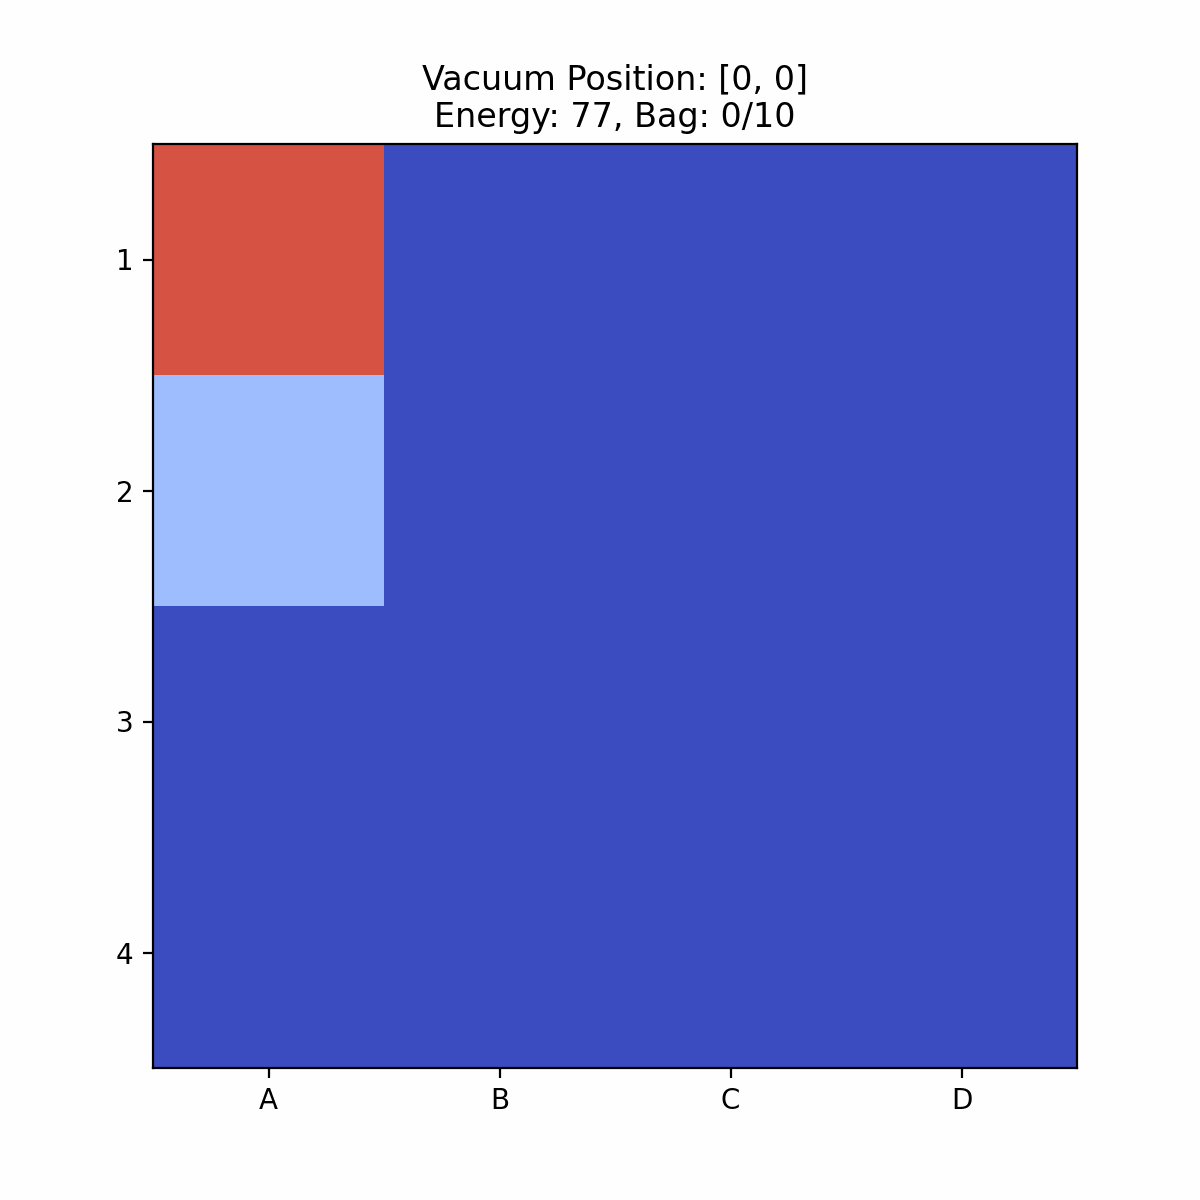

## Part C: Summary

### Lessons Learned
Developing this vacuum cleaner agent was an insightful process into AI-driven automation and optimization. The biggest challenge was ensuring an **efficient path** for cleaning while managing **energy** and **bag capacity** constraints.

### Energy Considerations
With a **100-energy point** limit, the vacuum can clean and return home, but an **optimized path** is essential. Implementing smarter algorithms like A search* can further enhance efficiency by reducing unnecessary movements.

### Scaling to Larger Environments
- Implementing a **bigger grid** (e.g., 8x8) will require a **graph-based search algorithm**.
- Using **machine learning** to predict the dirtiest areas first can improve efficiency.

### Handling Real-World Obstacles
- Adding **obstacle detection sensors**.
- Introducing **real-time path recalculations**.
- Using **LiDAR or vision-based** navigation for better adaptability.
